In [1]:
# 1) Using Sharpe ratio to optimise Portfolio for high returns

from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance
plt.style.use('fivethirtyeight')

In [2]:
# The 5 companies for which we will be optimising our portfolio
assets = ['TSLA','AMZN','AAPL','NFLX','MSFT']

In [3]:
# Assigning initial weights (arbitary)
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
stockStartDate = '2013-01-01'

In [5]:
stockEndDate = '2020-03-01'

In [6]:
df = pd.DataFrame()

for stock in assets:
  df[stock] = yfinance.download(tickers=stock, start=stockStartDate,end=stockEndDate, interval='1d')['Adj Close'] 

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,AMZN,AAPL,NFLX,MSFT
Date,,,,,
2012-12-31,6.774000,12.543500,16.394844,13.227143,22.133270
2013-01-02,7.072000,12.865500,16.914259,13.144286,22.887344
2013-01-03,6.954000,12.924000,16.700766,13.798571,22.580748
2013-01-04,6.880000,12.957500,16.235571,13.711429,22.158129
2013-01-07,6.868000,13.423000,16.140064,14.171429,22.116699
...,...,...,...,...,...
2020-02-24,166.757996,100.464500,73.426674,368.700012,167.414139
2020-02-25,159.981995,98.637001,70.939560,360.089996,164.651489
2020-02-26,155.759995,98.979500,72.064903,379.239990,166.708740


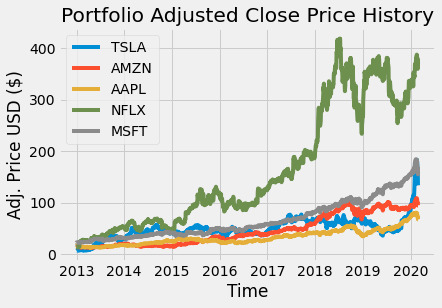

In [7]:
# Visual representation of the 5 stocks in the given 7 years 2 months duration

title = 'Portfolio Adjusted Close Price History'
my_stocks = df
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Time')
plt.ylabel('Adj. Price USD ($)')
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [8]:
# For daily returns
 
returns = df.pct_change()
returns

,TSLA,AMZN,AAPL,NFLX,MSFT
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.043992,0.025671,0.031682,-0.006264,0.034070
2013-01-03,-0.016686,0.004547,-0.012622,0.049777,-0.013396
2013-01-04,-0.010641,0.002592,-0.027855,-0.006315,-0.018716
2013-01-07,-0.001744,0.035925,-0.005883,0.033549,-0.001870
...,...,...,...,...,...
2020-02-24,-0.074595,-0.041356,-0.047500,-0.029916,-0.043115
2020-02-25,-0.040634,-0.018190,-0.033872,-0.023352,-0.016502
2020-02-26,-0.026390,0.003472,0.015863,0.053181,0.012495


In [9]:
# Create and show the annualised covariance matrix

cov_matrix_annual = returns.cov() * 252       # 252  = number of trading days in an year
cov_matrix_annual

,TSLA,AMZN,AAPL,NFLX,MSFT
TSLA,0.261265,0.043682,0.030129,0.061630,0.032456
AMZN,0.043682,0.086579,0.027852,0.054602,0.034727
AAPL,0.030129,0.027852,0.063459,0.023451,0.027294
NFLX,0.061630,0.054602,0.023451,0.208546,0.034530
MSFT,0.032456,0.034727,0.027294,0.034530,0.053898


In [10]:
# Calculating portfolio variance

port_variance = np.dot( np.transpose(weights), np.dot(cov_matrix_annual, weights))
port_variance

0.05657803456379321

In [11]:
# Calulating portfolio volitility (= standard deviation)

port_volatility = np.sqrt(port_variance)
port_volatility

0.23786137678024402

In [12]:
# Calculating annual portfolio return

portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.39392433035768293

In [13]:
percent_var = str(round(port_variance,2)*100) + '%'
percent_vols = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

print ('Expected Annual Return: ' + percent_ret)
print ('Annual Volatility/Risk: ' + percent_vols)
print ('Annual Variance: ' + percent_var)  

Expected Annual Return: 39.0%
Annual Volatility/Risk: 24.0%
Annual Variance: 6.0%


In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [15]:
# PortFolio Optimisation 

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimising for maximum Sharpe ratio (best trade-off for higher profit with lower risk)

ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('TSLA', 0.13843), ('AMZN', 0.07261), ('AAPL', 0.0564), ('NFLX', 0.25301), ('MSFT', 0.47955)])
Expected annual return: 41.0%
Annual volatility: 23.8%
Sharpe Ratio: 1.64


(0.40967300352071684, 0.23782676616328022, 1.638474128909386)

In [16]:
latest_prices = get_latest_prices(df)  
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)       # 15000 is assumed to be the total amount we have to invest 

# Final allocation
allocation , leftover = da.lp_portfolio(verbose = True)
print ('Discrete allocation:',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Funds remaining: 24.63
TSLA: allocated 0.143, desired 0.138
AMZN: allocated 0.075, desired 0.073
AAPL: allocated 0.058, desired 0.056
NFLX: allocated 0.246, desired 0.253
MSFT: allocated 0.477, desired 0.480
Allocation has RMSE: 0.004
Discrete allocation: {'TSLA': 16, 'AMZN': 12, 'AAPL': 13, 'NFLX': 10, 'MSFT': 45}
Funds remaining: $24.63


C:\Users\Asus\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
